# Random Forest Regression

## General Setup

In [1]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline

In [2]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 150)

In [3]:
# Load dataset
training_data = pd.read_csv("02-cleaned_data/cleaned_training.csv",index_col=0)

## Prepare the Data for Regression

In [4]:
# Define a "TotLivingSF" variable that takes all the livable square feet in a home
training_data["TotLivingSF"] = training_data["GrLivArea"] + training_data["TotalBsmtSF"] - training_data["LowQualFinSF"]

# Define an "AgeSold" variable as the age of the home when it was sold
training_data["AgeSold"] = training_data["YrSold"] - training_data["YearBuilt"] 

In [5]:
# Reduce the dataframe to only its necessary columns
training_data = training_data[["TotLivingSF","OverallQual","YearBuilt","AgeSold","ExterQual","GarageCars","CentralAir","YearRemodAdd","LotArea","OverallCond","FullBath","KitchenQual","Fireplaces","FireplaceQu","MSZoning","LotFrontage","BedroomAbvGr","Neighborhood","SalePrice"]]

In [6]:
# Separate x and y variables

# Matrix of independent variables
X = training_data.iloc[:,:-1].values

# Vector of dependent variable (home sale price)
y = np.log(training_data.iloc[:,-1]).values

In [7]:
# Enter the ordinal variables as numbers
training_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
training_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
training_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)

In [8]:
# Get the dummy variables for the nominal variables
data = training_data.iloc[:,:-1]
data_encoded = pd.get_dummies(data,columns=["CentralAir","MSZoning","Neighborhood"],drop_first=True)

In [9]:
# Define independent variables
X = data_encoded.values

In [10]:
# Separate the X and Y training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)

## Run the regression

In [11]:
# Define the model 
model = RandomForestRegressor(n_estimators = 400, n_jobs=-1, oob_score=False,min_samples_leaf = 1, max_features = 0.4)

In [12]:
# Fit and run the model
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
# Score the model
model.score(X_test, y_test)

0.8910025017215346

In [14]:
# Define the y predictions
y_pred = model.predict(X_test)

Training Score: 0.983158782594885
Testing Score: 0.8910025017215346
MSE: 0.016841327158711467


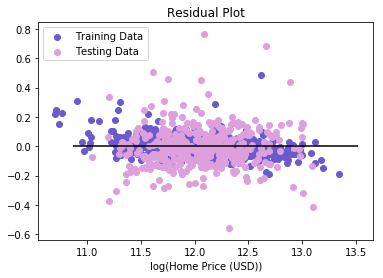

In [15]:
# Print the training and testing scores
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
MSE = mean_squared_error(y_test,y_pred)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"MSE: {MSE}")

# Create a scatter plot of the residuals for the training and testing dataset
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="slateblue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="plum", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.xlabel("log(Home Price (USD))")
plt.show()

In [16]:
# Export testing's predictions and actual values to CSV so that they can be used in Tableau dashboard
actual_predictions = pd.DataFrame({"actual":y_test,"predictions":y_pred})
actual_predictions[["actual","predictions"]] = np.exp(actual_predictions[["actual","predictions"]])
actual_predictions.to_csv("03-kaggle_submission/03_actual_predictions_rf.csv",header=True)

## Kaggle Submission

In [17]:
# Load dataset
testing_data = pd.read_csv("02-cleaned_data/cleaned_testing.csv",index_col=0)

In [18]:
# Define a "TotLivingSF" variable that takes all the livable square feet in a home
testing_data["TotLivingSF"] = testing_data["GrLivArea"] + testing_data["TotalBsmtSF"] - testing_data["LowQualFinSF"]

# Define "AgeSold" variable as the age of the homes when they were sold
testing_data["AgeSold"] = testing_data["YrSold"] - testing_data["YearBuilt"] 


In [19]:
# Reduce dataframe to just the necessary variables
testing_data = testing_data[["TotLivingSF","OverallQual","YearBuilt","AgeSold","ExterQual","GarageCars","CentralAir","YearRemodAdd","LotArea","OverallCond","FullBath","KitchenQual","Fireplaces","FireplaceQu","MSZoning","LotFrontage","BedroomAbvGr","Neighborhood"]]

In [20]:
# Enter the ordinal variables as numbers
testing_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
testing_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
testing_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)

In [21]:
# Get dummy variables for nominal variables
data_encoded_testing = pd.get_dummies(testing_data,columns=["CentralAir","MSZoning","Neighborhood"],drop_first=True)

# Define the independent testing values and the dependent predictions
X_testing_values = data_encoded_testing.values
y_pred_testing = model.predict(X_testing_values)
testing_data["SalePrice"] = y_pred_testing

# Export the predictions for the Kaggle competition to a CSV
kaggle_output = testing_data["SalePrice"]
kaggle_output.to_csv("03-kaggle_submission/random_forest_solution.csv",header=True)

# Gradient Boosting Regression (To Be Completed After Bootcamp Graduation)

In [22]:
# GBR = GradientBoostingRegressor(n_estimators = 100)

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)

In [24]:
# GBR.fit(X_train,y_train)

In [25]:
# y_pred = GBR.predict(X_test)

In [26]:
# GBR.score(X_test, y_test)

In [27]:
# Fit the model to the training data and calculate the scores for the training and testing data

# ### BEGIN SOLUTION
# training_score = GBR.score(X_train, y_train)
# testing_score = GBR.score(X_test, y_test)
# MSE = mean_squared_error(y_test,y_pred)
### END SOLUTION 

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")
# print(f"MSE: {MSE}")
### BEGIN SOLUTION
# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(GBR.predict(X_train), GBR.predict(X_train) - y_train, c="slateblue", label="Training Data")
# plt.scatter(y_pred, y_pred - y_test, c="plum", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.xlabel("log(Home Price (USD))")
# plt.show()
### END SOLUTION

In [28]:
# Load dataset
# testing_data = pd.read_csv("02-cleaned_data/cleaned_testing.csv",index_col=0)

In [29]:
# Define a "TotLivingSF" variable that takes all the livable square feet in a home
# testing_data["TotLivingSF"] = testing_data["GrLivArea"] + testing_data["TotalBsmtSF"] - testing_data["LowQualFinSF"]
# testing_data["AgeSold"] = testing_data["YrSold"] - testing_data["YearBuilt"] 
# testing_data = testing_data[["TotLivingSF","OverallQual","YearBuilt","AgeSold","ExterQual","GarageCars","CentralAir","YearRemodAdd","LotArea","OverallCond","FullBath","KitchenQual","Fireplaces","FireplaceQu","MSZoning","LotFrontage","BedroomAbvGr","Neighborhood"]]

In [30]:
# testing_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# testing_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
# testing_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)

In [31]:
# data_encoded_testing = pd.get_dummies(testing_data,columns=["CentralAir","MSZoning","Neighborhood"],drop_first=True)

In [32]:
# X_testing_values = data_encoded_testing.values

In [33]:
# y_pred_testing = GBR.predict(X_testing_values)

In [34]:
# testing_data["SalePrice"] = y_pred_testing

In [35]:
# testing_data['SalePrice'] = np.exp(testing_data['SalePrice'])

In [36]:
# kaggle_output = testing_data["SalePrice"]

In [37]:
# kaggle_output.to_csv("03-kaggle_submission/GBR_solution.csv",header=True)